In [259]:
import pandas as pd
from surprise import SVD, accuracy
from surprise import Reader, Dataset
from surprise import accuracy
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import re
from gensim.models import word2vec
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
from surprise.dataset import DatasetAutoFolds
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import tqdm
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [260]:
csv1 = pd.read_csv('jobplanet_reviews2.csv')
csv0 = pd.read_csv('jobplanet_reviews.csv')
csv0 = pd.concat([csv0, csv1], ignore_index=True)

In [261]:
dd = csv0[['회사','직무','총점','총평']]
dd

,회사,직무,총점,총평
0,(주)티몬,기획/경영,60%,\nBEST\n 젊은 기업이었지만 점점 변하는 느낌을 강하게 받았습니다\n...
1,(주)티몬,개발,60%,\nBEST\n 인수후 개발자가 본인의 업무에 책임감을 가지고 일힐 수 있...
2,(주)티몬,마케팅/시장조사,60%,\nBEST\n 다양한 경험을 할 수 있는것은 좋았으나. 업무량이 다소 많...
3,(주)티몬,개발,60%,\nBEST\n 개발자가 자신의 강점을 보이고 약점을 보완하게끔 장려하는 ...
4,(주)티몬,마케팅/시장조사,60%,\nBEST\n 어떤 마음을 가지고 행동하는가에 따라 달라질수 있는 회사\...
...,...,...,...,...
29581,현대에이치디에스(주),개발,60%,\nBEST\n 현대해상 IT 자회사로 현대해상 전산시스템 개발및유지보수를...
29582,현대에이치디에스(주),개발,60%,\nBEST\n 그냥저냥 무난하게 다닐만한 회사 여자가 다니기 좋은 회사\...
29583,현대에이치디에스(주),개발,20%,\nBEST\n 옛날에는 좋았다고 들었지만 현재는 모두가 탈출하고 싶어함\...
29584,현대에이치디에스(주),영업/제휴,60%,\nBEST\n 먹거리가 점점 줄고 새로운 수익을 위한 혁신은 없음\n


In [262]:
csv0['총평'] = csv0['총평'].apply(lambda v: v.replace("\n","").replace("BEST",""))

In [263]:
csv0['총평']

0                       젊은 기업이었지만 점점 변하는 느낌을 강하게 받았습니다    
1                인수후 개발자가 본인의 업무에 책임감을 가지고 일힐 수 있을지 의문    
2                    다양한 경험을 할 수 있는것은 좋았으나. 업무량이 다소 많음    
3              개발자가 자신의 강점을 보이고 약점을 보완하게끔 장려하는 곳으로 다양한 ...
4                      어떤 마음을 가지고 행동하는가에 따라 달라질수 있는 회사    
                               ...                        
29581            현대해상 IT 자회사로 현대해상 전산시스템 개발및유지보수를 하고있음    
29582                  그냥저냥 무난하게 다닐만한 회사 여자가 다니기 좋은 회사    
29583                  옛날에는 좋았다고 들었지만 현재는 모두가 탈출하고 싶어함    
29584                     먹거리가 점점 줄고 새로운 수익을 위한 혁신은 없음    
29585          연봉이 매우 적음 워라밸은 케바케지만 대체로 좋은편 발전가능성은 없는것같...
Name: 총평, Length: 29586, dtype: object

In [264]:
tokenizer = RegexpTokenizer('\w+')
tokens = csv0['총평'].apply( tokenizer.tokenize )
tokens

0                   [젊은, 기업이었지만, 점점, 변하는, 느낌을, 강하게, 받았습니다]
1         [인수후, 개발자가, 본인의, 업무에, 책임감을, 가지고, 일힐, 수, 있을지, 의문]
2               [다양한, 경험을, 할, 수, 있는것은, 좋았으나, 업무량이, 다소, 많음]
3        [개발자가, 자신의, 강점을, 보이고, 약점을, 보완하게끔, 장려하는, 곳으로, 다...
4                 [어떤, 마음을, 가지고, 행동하는가에, 따라, 달라질수, 있는, 회사]
                               ...                        
29581        [현대해상, IT, 자회사로, 현대해상, 전산시스템, 개발및유지보수를, 하고있음]
29582             [그냥저냥, 무난하게, 다닐만한, 회사, 여자가, 다니기, 좋은, 회사]
29583              [옛날에는, 좋았다고, 들었지만, 현재는, 모두가, 탈출하고, 싶어함]
29584                [먹거리가, 점점, 줄고, 새로운, 수익을, 위한, 혁신은, 없음]
29585    [연봉이, 매우, 적음, 워라밸은, 케바케지만, 대체로, 좋은편, 발전가능성은, 없...
Name: 총평, Length: 29586, dtype: object

In [265]:
model = word2vec.Word2Vec(min_count = 1, window = 2, vector_size = 300) 
model.build_vocab(tokens)
model.train(tokens, total_examples = model.corpus_count, epochs = 300)


(89923010, 94924200)

In [266]:
model.wv.most_similar('경험')

[('레퍼런스를', 0.45498672127723694),
 ('경험을', 0.4458049237728119),
 ('경험은', 0.4242933690547943),
 ('레퍼런스', 0.4095809757709503),
 ('AUTODESK', 0.3977360427379608),
 ('포트폴리오', 0.39004814624786377),
 ('다양한개발프로젝트', 0.3862200379371643),
 ('포폴을', 0.38248005509376526),
 ('포폴', 0.36648744344711304),
 ('유용하다', 0.36415642499923706)]

In [267]:
model.predict_output_word('회사',2)

[('자체는', 0.057276193), ('쉬우나', 0.0013505027)]

In [268]:
X = model.wv[model.wv.key_to_index]
tsne = TSNE( n_components=2 )
X_tsne = tsne.fit_transform( X[:150] )
X_tsne.shape
vv = sorted(model.wv.key_to_index, key= model.wv.key_to_index.get)

c:\Users\NTX550\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\NTX550\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [269]:
df = pd.DataFrame( X_tsne, index=vv[:150], columns=['x','y'])

In [270]:
df

,x,y
회사,-15.016222,13.790285
수,-9.975307,10.610670
있는,-20.725491,14.455752
좋은,-1.632534,3.265476
곳,-16.711391,17.579514
...,...,...
새로운,-13.989557,-7.386752
기회가,16.760960,3.590564
워라밸은,23.490164,-14.452262
워라밸이,23.320175,-21.404949


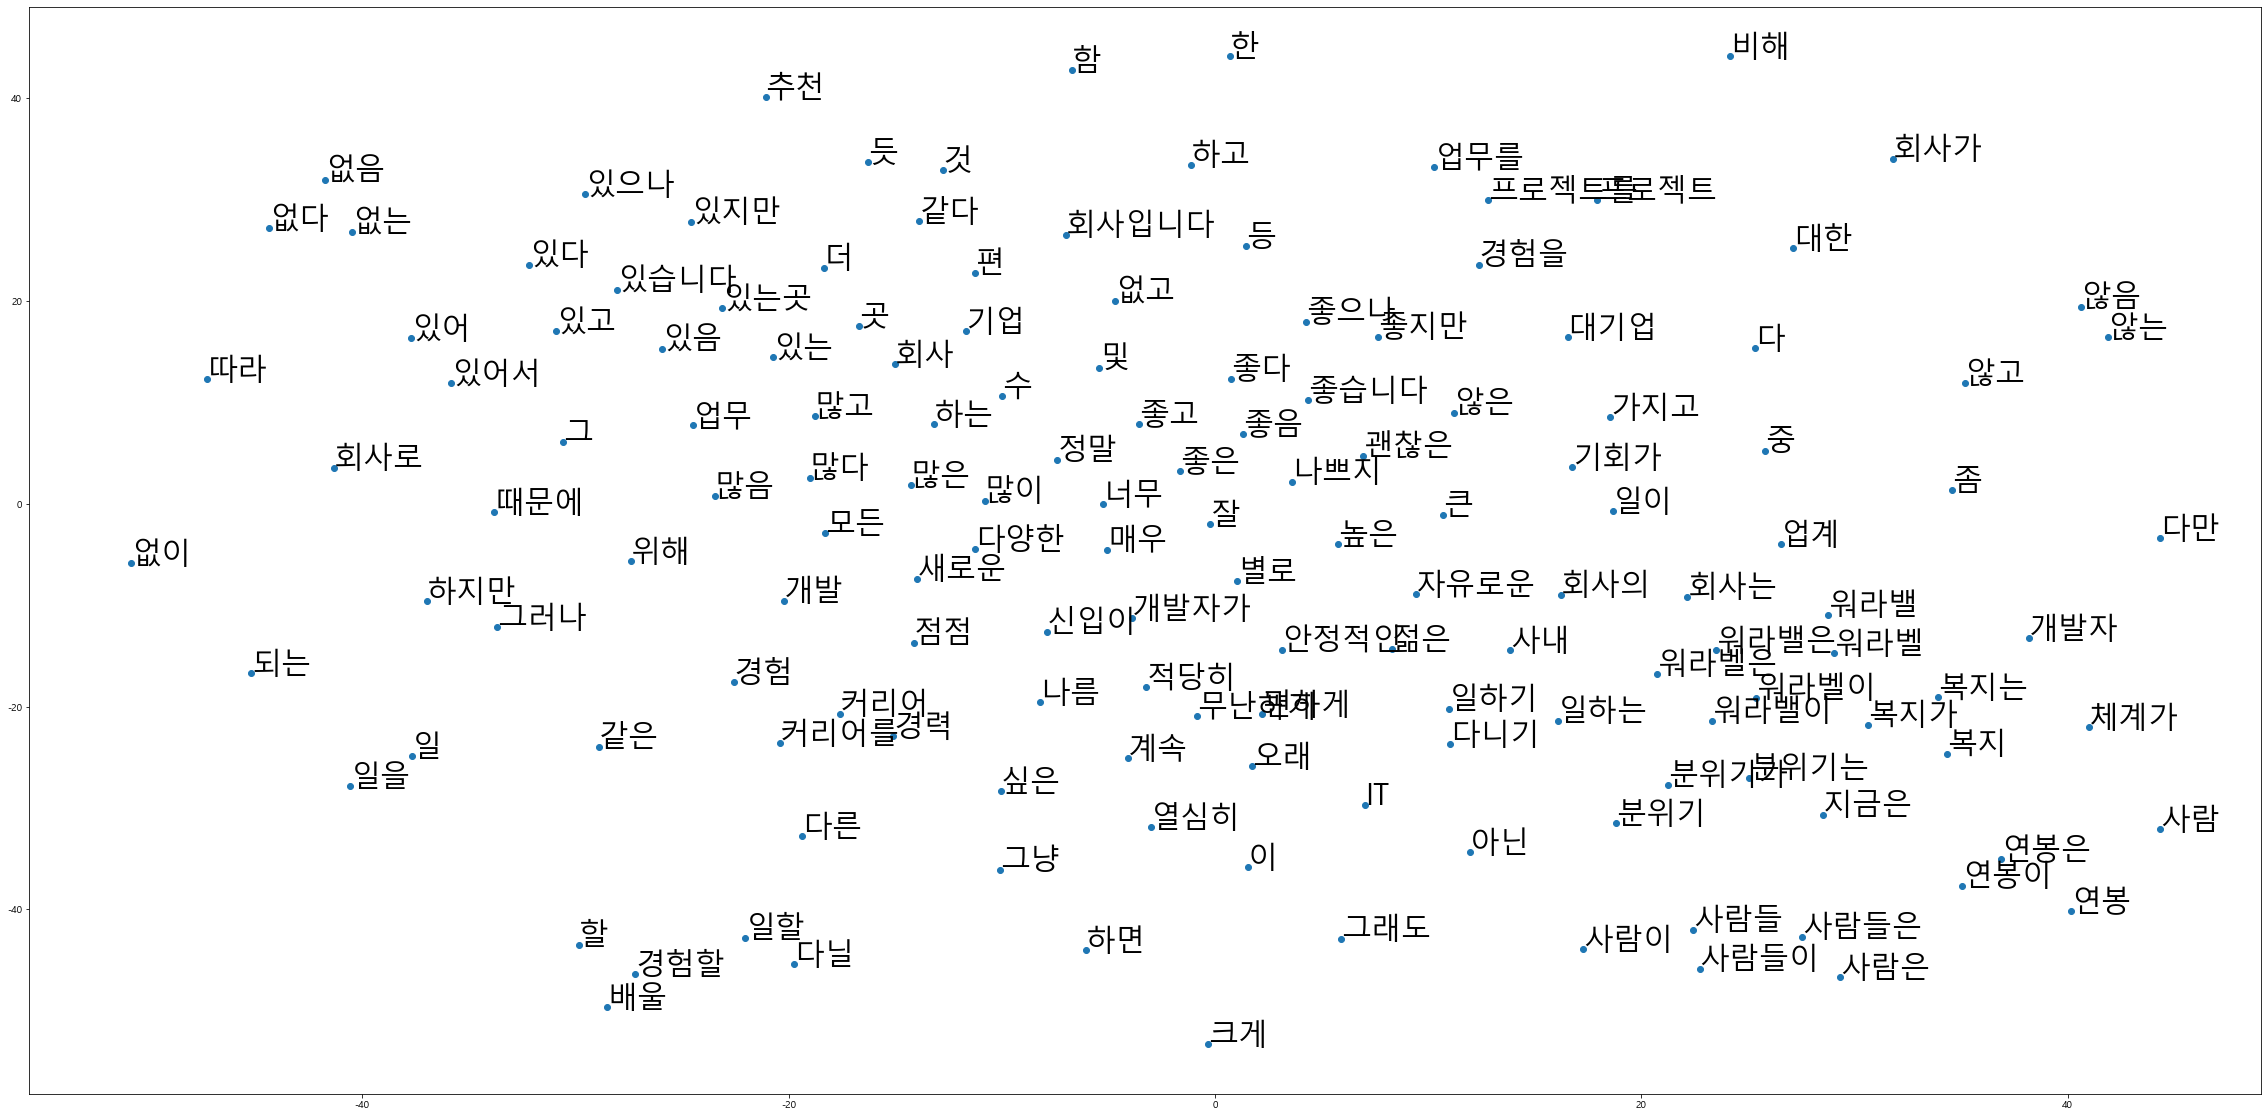

In [271]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [272]:
#2
vect = CountVectorizer() 

In [273]:
csv0

,Unnamed: 0,회사,직무,상황,지역,작성일,총점,승진 기회 및 가능성,복지 및 급여,업무와 삶의 균형,사내문화,경영진,총평,장점,단점,바라는점
0,0,(주)티몬,기획/경영,\n 전직원\n,서울,2022. 12,60%,60%,80%,60%,60%,20%,젊은 기업이었지만 점점 변하는 느낌을 강하게 받았습니다,연차 자유롭게 사용티몬 카페 있음수평적인 분위기였음,취합 지옥야근할수밖에 없는 업무량제가 있던 팀은 분위기 삭막했습니다,없습니다 직원들이 바라는 점이 있어 들어주었다면 이렇게 추락하지는 않았을겁다
1,1,(주)티몬,개발,\n 전직원\n,서울,2022. 12,60%,20%,40%,60%,40%,20%,인수후 개발자가 본인의 업무에 책임감을 가지고 일힐 수 있을지 의문,연차는 눈치 안보고 사용할 수 있으며 인수후에도 자유로운 분위기는 꽤 자유롭다,인수후 업무에 대한 책임을 가지고 할 수 없게끔 일들이 들어온다,책임을 가지고 일을 할 수 있도록 환경을 만들어 주는게 좋을 것 같다 인수후 보여준...
2,2,(주)티몬,마케팅/시장조사,\n 전직원\n,서울,2022. 12,60%,60%,60%,60%,60%,60%,다양한 경험을 할 수 있는것은 좋았으나. 업무량이 다소 많음,교통이 편리합니다. 조직 내 소통이 자유롭고 빠른 피드백을 통해. 업무에 능률이 높...,다소 비효율적인 업무처리 과정이 많은듯합니다. 직원을 생각한 체계를 마련해줬으면 좋...,경영진에 바라는점은 따로 없습니다. 위 단점처럼 체계를 부탁드립니다
3,3,(주)티몬,개발,\n 전직원\n,기타,2022. 12,60%,60%,60%,60%,60%,60%,개발자가 자신의 강점을 보이고 약점을 보완하게끔 장려하는 곳으로 다양한 ...,자기계발을 위한 개발 비용 지원하는 부분이 좋고 업무 분담 체계가 깔끔한 편이고 자...,단순 보고를 위한 문서작업이 많아 비효율적이고 복지제도가 실제 활용할 수 있는 것이...,직원들의 목소리에 귀 기울이고 해결책을 마련해주길 바랍니다 합리적인 보상 체계를 마...
4,4,(주)티몬,마케팅/시장조사,\n 현직원\n,서울,2022. 12,60%,60%,60%,60%,60%,40%,어떤 마음을 가지고 행동하는가에 따라 달라질수 있는 회사,각자 개인으로 진행하는 일이 많아서 서로에게 별로 관심이 없지만 친해지고 좋아지면 ...,단순 보고가 많아 잡일이 많음 할게 너무 많고 회의도 많음 지겹도록 일이 많은데 돈...,신규사업에 적극적으로 대응했으면하고 그일에 대하여 전문적인 지식을 가지고 있었으면 합니다
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,14808,현대에이치디에스(주),개발,\n 현직원\n,서울,2019. 04,60%,60%,60%,60%,60%,60%,현대해상 IT 자회사로 현대해상 전산시스템 개발및유지보수를 하고있음,윗 사람 눈치 안 보고 일할수 있음 평균수준 연봉 만 받고 걱정없이 다니기에 좋음,부서마다 다르지만 일이 많은 부서는 일과 야근이 많음없는 부서는 칼퇴,직원들 처우 개선에서 좀 더 힘써주길 바람
29582,14809,현대에이치디에스(주),개발,\n 현직원\n,서울,2019. 03,60%,40%,60%,80%,60%,40%,그냥저냥 무난하게 다닐만한 회사 여자가 다니기 좋은 회사,대체로 화기애애하며 가족적인 분위기 팀마다 다르지만 대부분 휴가를 눈치 안보고 쓸수 있음,어떤 팀에 가느냐에 따라 야근을 밥먹듯이 할수도 칼퇴를 할수도 있음 언제부턴가 회사...,직원들의 건의사항에 좀더 귀기울일 필요가 있다 연봉인상률 상향 필요 협력을 줄이고 ...
29583,14810,현대에이치디에스(주),개발,\n 전직원\n,서울,2019. 03,20%,40%,40%,60%,40%,20%,옛날에는 좋았다고 들었지만 현재는 모두가 탈출하고 싶어함,복지는 이것저것 많이 챙겨줌 복지카드 있음 잠실근무 가능,나아지려는 모습이 전혀없고 현재에 안주하는 문화입니다,진정 회사를 위한 길을 찾기위해 노려하면 좋겠습니다모회사 눈치는 그만보고
29584,14811,현대에이치디에스(주),영업/제휴,\n 전직원\n,서울,2019. 03,60%,60%,60%,80%,40%,60%,먹거리가 점점 줄고 새로운 수익을 위한 혁신은 없음,현대백화점그룹 이름값 강력한 노조로 인한 해고 불안감은 상대적으로 적음 진급시마다 ...,변화가 없음 고인물입니다 혁신은 어디에도 없고 몇십년째 같은 사업만 영위하는 중 수...,신규 사업 추진에 적극적으로 임했으면 좋겠습니다


In [274]:
csv0['총점'] = csv0['총점'].apply(lambda v: v.replace('%','')).astype('float').apply(lambda v:v/20).astype('float')

In [275]:
# csv0[['회사','직무','총점']]
csv_split = csv0[["회사","직무","총점"]]
csv_split

,회사,직무,총점
0,(주)티몬,기획/경영,3.0
1,(주)티몬,개발,3.0
2,(주)티몬,마케팅/시장조사,3.0
3,(주)티몬,개발,3.0
4,(주)티몬,마케팅/시장조사,3.0
...,...,...,...
29581,현대에이치디에스(주),개발,3.0
29582,현대에이치디에스(주),개발,3.0
29583,현대에이치디에스(주),개발,1.0
29584,현대에이치디에스(주),영업/제휴,3.0


In [276]:
ratings_matrix = csv_split.pivot_table('총점', index='직무', columns='회사')
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix

회사,(유)미소,(주)가온아이,(주)골드넥스,(주)골프존,(주)곰앤컴퍼니,(주)그라비티,(주)네오위즈,(주)넥슨코리아,(주)녹십자헬스케어,(주)농협정보시스템,...,한빛소프트(주),한솔인티큐브(주),한일네트웍스(주),한전케이디엔(주),한진정보통신(주),현대에이치디에스(주),현대엠엔소프트(주),현대오토에버(주),효성아이티엑스(주),휴넷(주)
직무,,,,,,,,,,,,,,,,,,,,,
\n 전직원\n,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
\n 현직원\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2020. 08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
개발,3.437500,2.164706,0.000000,3.708333,2.837838,2.309091,3.571429,4.041667,2.130435,3.097561,...,2.625000,2.955882,3.024096,3.509091,2.897727,3.073171,2.772727,3.380282,2.571429,3.000000
경기,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [277]:
reader = Reader()
data = Dataset.load_from_df(csv_split, reader= reader)
data = DatasetAutoFolds.build_full_trainset(data)

In [278]:
model = SVD()
model.fit(data)

In [279]:
model.compute_similarities()

array([[1.        , 0.32015282, 0.28130599, ..., 0.32229461, 0.30355652,
        0.33225284],
       [0.32015282, 1.        , 0.31589958, ..., 0.34592403, 0.30649926,
        0.36639879],
       [0.28130599, 0.31589958, 1.        , ..., 0.31498471, 0.28206052,
        0.32887701],
       ...,
       [0.32229461, 0.34592403, 0.31498471, ..., 1.        , 0.31573999,
        0.36151343],
       [0.30355652, 0.30649926, 0.28206052, ..., 0.31573999, 1.        ,
        0.33674272],
       [0.33225284, 0.36639879, 0.32887701, ..., 0.36151343, 0.33674272,
        1.        ]])

In [280]:
csv_end = pd.DataFrame(model.compute_similarities(), index=csv0["회사"].unique(), columns=csv0["회사"].unique())
csv_end["(주)티몬"].sort_values(ascending = False)[0:10]

(주)티몬               1.000000
디케이유엔씨(주)           0.385348
이데일리(주)             0.366818
아시아나아이디티(주)         0.366783
대우정보시스템(주)          0.362878
한국아이비엠테크니컬솔루션(유)    0.359974
(주)커넥트웨이브           0.359446
(주)아이비케이시스템         0.356417
블루버드(주)             0.356376
(주)이테크시스템           0.356329
Name: (주)티몬, dtype: float64

In [281]:
company_info = pd.read_csv("comp_info (3).csv", encoding='utf-8')
company_info.rename(columns={"Unnamed: 0":"companyId"}, inplace=True)
comp_map = {company_info.iat[i, 1]:company_info.iat[i, 0] for i in range(len(company_info))}
company_info.head()

,companyId,company,avg_score,avg_wage,review_cnt
0,0,(주)티몬,2.8,4453,2214
1,1,(주)위메프,2.6,4228,2178
2,2,(주)엘지유플러스,3.2,5098,1933
3,3,삼성에스디에스(주),3.5,6297,1911
4,4,(주)엘지씨엔에스,3.1,5643,1865


In [282]:
def get_document_vectors(tokens):
    document_embedding_list = []

    # 각 문서에 대해서
    for line in tqdm(tokens):
        doc2vec = None
        count = 0
        for word in line:
            if word in model.wv.key_to_index:
                count += 1
                # 해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = model.wv[word]
                else:
                    doc2vec = doc2vec + model.wv[word]

        if doc2vec is not None:
            # 단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    # 각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list

In [ ]:
temp_sentence = df[["회사", "총평"]].groupby("회사").sum()
tokenizer = RegexpTokenizer('\w+')
token = temp_sentence.총평.apply(tokenizer.tokenize)
token

In [ ]:
document_embedding_list = get_document_vectors(token)

In [ ]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)

In [ ]:
df_sim = pd.DataFrame(cosine_similarities, index=temp_sentence.index, columns=temp_sentence.index )
df_sim

In [ ]:
def recommendations(company, k):
    print(company_info[company_info.company == company][["company", "avg_score", "avg_wage"]])
    
    result = df_sim[company].sort_values(ascending=False)[1:k+1].index.values.tolist()

    temp = pd.DataFrame()
    for comp in result:
        temp = pd.concat([temp, company_info[company_info.company == comp][["company", "avg_score", "avg_wage"]]])

    return temp.reset_index(drop=True)

recommendations("(주)네오위즈", 10)

In [289]:
#3 유사도 백터
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [290]:
ratings_pred = predict_rating(ratings_matrix.values , csv_end.values) #평점 예측값 구함터
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
print(ratings_pred_matrix.shape)
ratings_pred_matrix.head(3)

(30, 300)


회사,(유)미소,(주)가온아이,(주)골드넥스,(주)골프존,(주)곰앤컴퍼니,(주)그라비티,(주)네오위즈,(주)넥슨코리아,(주)녹십자헬스케어,(주)농협정보시스템,...,한빛소프트(주),한솔인티큐브(주),한일네트웍스(주),한전케이디엔(주),한진정보통신(주),현대에이치디에스(주),현대엠엔소프트(주),현대오토에버(주),효성아이티엑스(주),휴넷(주)
직무,,,,,,,,,,,,,,,,,,,,,
\n 전직원\n,0.145087,0.141877,0.168441,0.143557,0.143282,0.146382,0.143651,0.138507,0.142905,0.142718,...,0.149385,0.140596,0.143082,0.145025,0.156620,0.143234,0.142052,0.144518,0.144843,0.144796
\n 현직원\n,0.274462,0.286571,0.297271,0.299448,0.286898,0.281080,0.310852,0.271088,0.275931,0.312754,...,0.299339,0.289704,0.290685,0.278256,0.265467,0.275791,0.280324,0.280564,0.276285,0.311151
2020. 08,0.013220,0.014644,0.016821,0.016210,0.014864,0.013495,0.018195,0.011409,0.013175,0.018577,...,0.016980,0.015929,0.016225,0.013285,0.011605,0.012575,0.013786,0.013792,0.013252,0.014252


In [291]:
def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

def predict_rating_topsim(ratings_arr, item_sim_arr, n=11): #TOP_N 유사도
    pred = np.zeros(ratings_arr.shape)

    for col in range(ratings_arr.shape[1]):
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))        
    return pred

아이템 기반 모든 인접 이웃 MSE:  2.875227404809847


In [292]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , csv_end.values, n=11)
print('아이템 기반 인접 TOP-11 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix

C:\Users\NTX550\AppData\Local\Temp\ipykernel_17276\3780663794.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
C:\Users\NTX550\AppData\Local\Temp\ipykernel_17276\3780663794.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))


아이템 기반 인접 TOP-11 이웃 MSE:  2.0106419672191387


회사,(유)미소,(주)가온아이,(주)골드넥스,(주)골프존,(주)곰앤컴퍼니,(주)그라비티,(주)네오위즈,(주)넥슨코리아,(주)녹십자헬스케어,(주)농협정보시스템,...,한빛소프트(주),한솔인티큐브(주),한일네트웍스(주),한전케이디엔(주),한진정보통신(주),현대에이치디에스(주),현대엠엔소프트(주),현대오토에버(주),효성아이티엑스(주),휴넷(주)
직무,,,,,,,,,,,,,,,,,,,,,
\n 전직원\n,0.000000,0.000000,0.867304,0.000000,0.000000,0.000000,0.000000,0.000000,0.342771,0.000000,...,0.629705,0.000000,0.000000,0.329287,0.535032,0.333175,0.317598,0.339164,0.346414,0.000000
\n 현직원\n,0.000000,0.385366,0.000000,0.388592,0.000000,0.000000,0.723058,0.000000,0.000000,0.705770,...,0.000000,0.372092,0.393672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952921
2020. 08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 04,0.000000,0.000000,0.000000,0.299771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.313406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022. 12,0.000000,0.308293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.297674,0.314938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.762337
개발,2.685795,2.289639,2.110365,2.843872,2.652797,2.516142,3.162550,2.937058,2.215430,3.165705,...,2.589820,2.607929,2.592253,2.982823,2.614494,2.519162,2.397497,2.527941,2.199489,2.698717
경기,0.000000,0.000000,1.156405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.317264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [293]:
def get_unseen(ratings_matrix, userId):  #이미 나온거 안나오게
    user_rating = ratings_matrix.loc[userId,:]
    already_seen = user_rating[ user_rating > 0].index.tolist()
    movies_list = ratings_matrix.columns.tolist()
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [294]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10): #필터링 된거 나오게
    recomm = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm
    
    
get_unseen(ratings_matrix, '디자인')
unseen_list = get_unseen(ratings_matrix, '디자인')
recomm = recomm_movie_by_userid(ratings_pred_matrix, '디자인', unseen_list, top_n=10)
recomm = pd.DataFrame(data=recomm.values,index=recomm.index,columns=['pred_score'])
recomm

,pred_score
회사,
(주)컴파트너스,2.110685
메타넷글로벌(유),2.025553
한국아이비엠(주),2.017936
한전케이디엔(주),2.015190
대보정보통신(주),2.013573
(주)에쓰씨케이,1.997386
(주)농협정보시스템,1.962000
인피니트헬스케어(주),1.948066
(주)와이즈스톤,1.925429
